# Iris Flower Classification

Iris Flower Classification is a popular and classic machine learning problem in the field of data science and pattern recognition. The objective of this task is to predict the species of iris flowers based on the measurements of their floral features.

Iris Flower Classification is a supervised learning problem because the dataset contains labeled samples, i.e., each flower sample comes with the true species label. The model is trained on the labeled data, and once trained, it can predict the species of new, unlabeled iris flowers with reasonable accuracy.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv("Iris.csv")

In [3]:
df=df1.copy()

In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

**Data properties and Data cleaning **

In [7]:
df.drop(columns=['Id'],axis=0,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
df.shape
print('Rows ---->',df.shape[0])
print('Columns ---->',df.shape[1])

Rows ----> 150
Columns ----> 5


In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.size

750

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.columns = ['sl','sw','pl','pw','species']
df_split_iris=df.species.str.split('-',n=-1,expand=True) #Remove prefix 'Iris-' from species col
df_split_iris.drop(columns=0,axis=1,inplace=True)#Drop 'Iris-' col
df_split_iris

,1
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [23]:
df3_full=df.join(df_split_iris)
df3_full

,sl,sw,pl,pw,species,1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [24]:
df3_full.rename({1:'species1'},axis=1,inplace=True) #Rename column
df3_full

,sl,sw,pl,pw,species,species1
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica


In [25]:
df3_full.drop(columns='species',axis=1,inplace=True) #Drop excessive column

In [26]:
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [27]:
df3_full.shape

(150, 5)

In [28]:
df3_full.isna()

,sl,sw,pl,pw,species1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [29]:
df3_full.isna().sum()

sl          0
sw          0
pl          0
pw          0
species1    0
dtype: int64

In [30]:
df3_full.corr(numeric_only=True)

,sl,sw,pl,pw
sl,1.000000,-0.109369,0.871754,0.817954
sw,-0.109369,1.000000,-0.420516,-0.356544
pl,0.871754,-0.420516,1.000000,0.962757
pw,0.817954,-0.356544,0.962757,1.000000


In [31]:
df3_full.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df3_full.species1.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species1, dtype: int64

# **# Data Visualisation**

In [33]:
df3_full.columns # check column names

Index(['sl', 'sw', 'pl', 'pw', 'species1'], dtype='object')

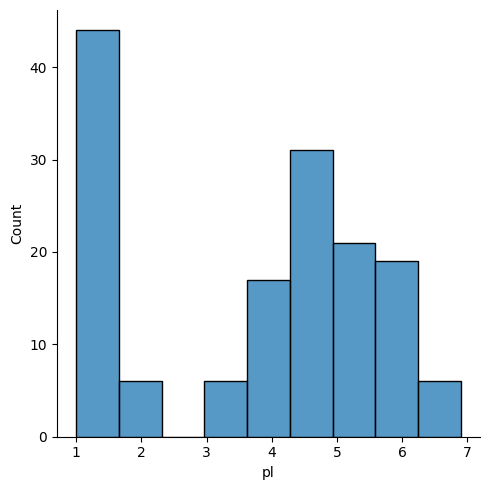

In [34]:
sns.displot(df3_full['pl'])

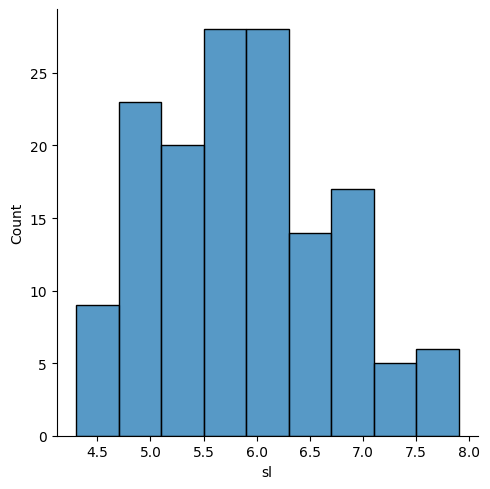

In [35]:
sns.displot(df3_full['sl'])

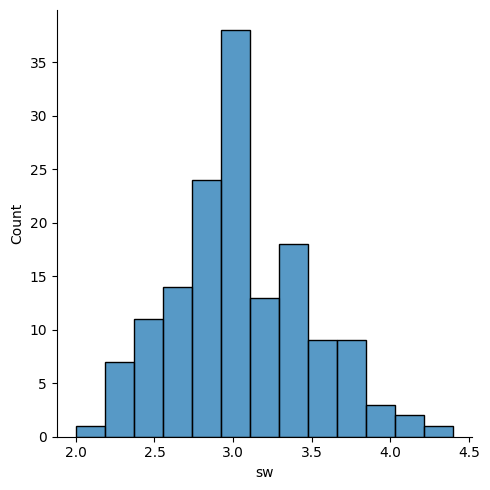

In [36]:
sns.displot(df3_full['sw'])

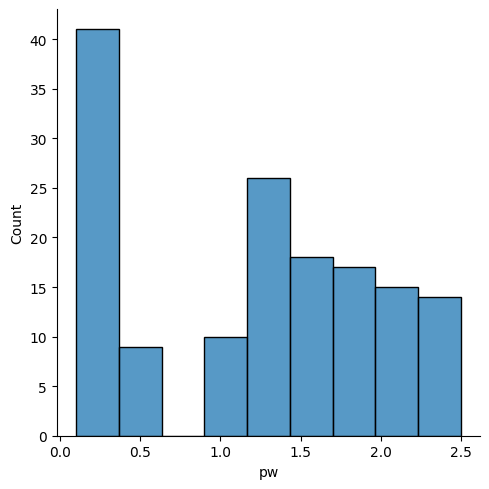

In [37]:
sns.displot(df3_full['pw'])

<Axes: xlabel='species1', ylabel='sw'>

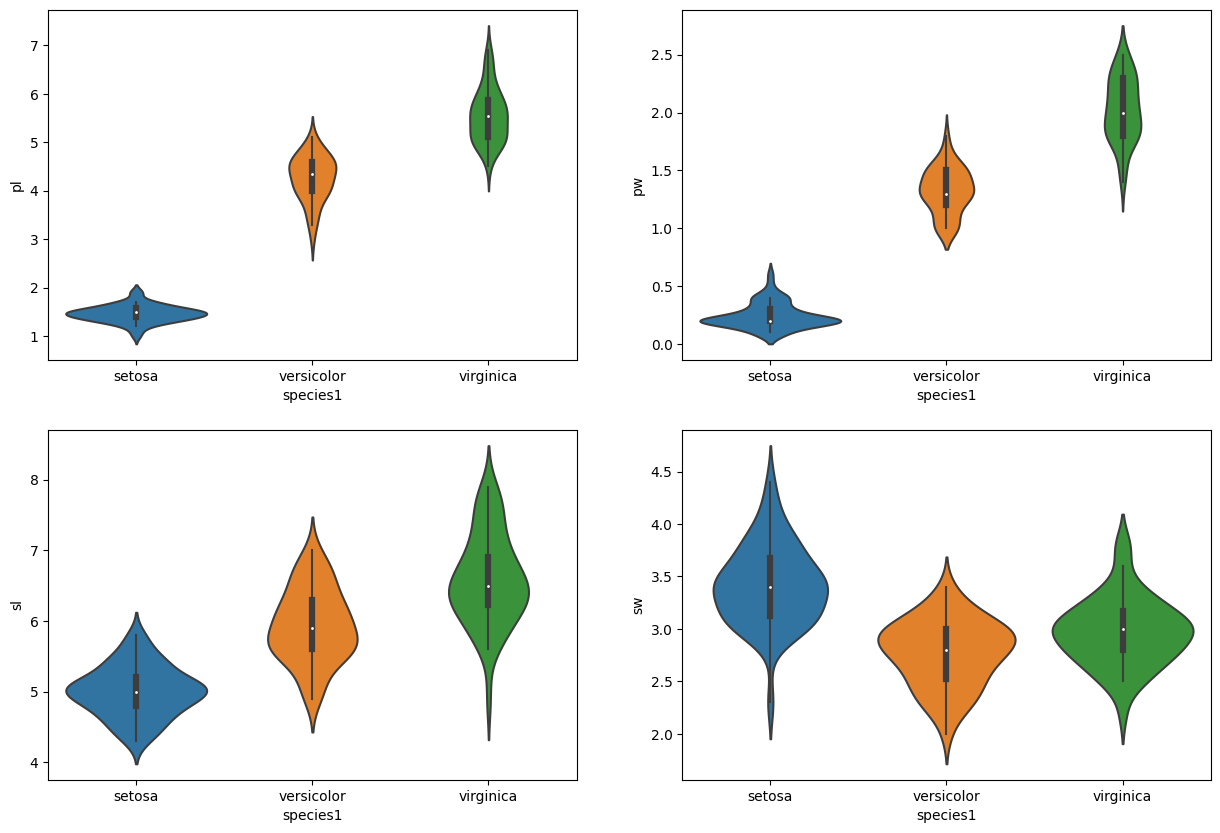

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species1',y='pl',data=df3_full)
plt.subplot(2,2,2)
sns.violinplot(x='species1',y='pw',data=df3_full)
plt.subplot(2,2,3)
sns.violinplot(x='species1',y='sl',data=df3_full)
plt.subplot(2,2,4)
sns.violinplot(x='species1',y='sw',data=df3_full)

<Axes: xlabel='sl', ylabel='pl'>

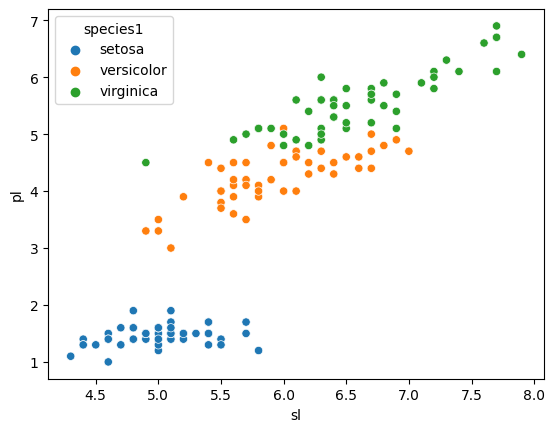

In [39]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pl,hue=df3_full.species1)

<Axes: xlabel='pl', ylabel='pw'>

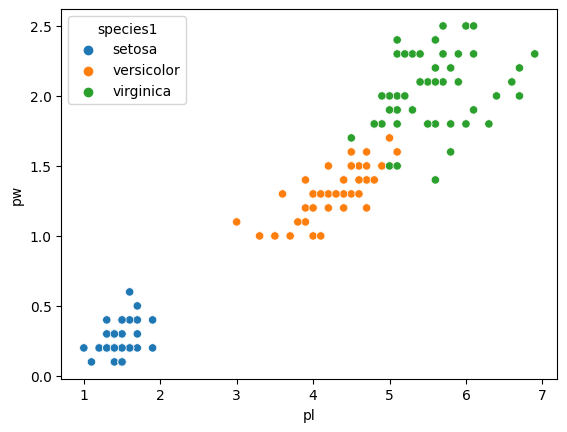

In [40]:
sns.scatterplot(x=df3_full.pl,y=df3_full.pw,hue=df3_full.species1)

<Axes: xlabel='sl', ylabel='pw'>

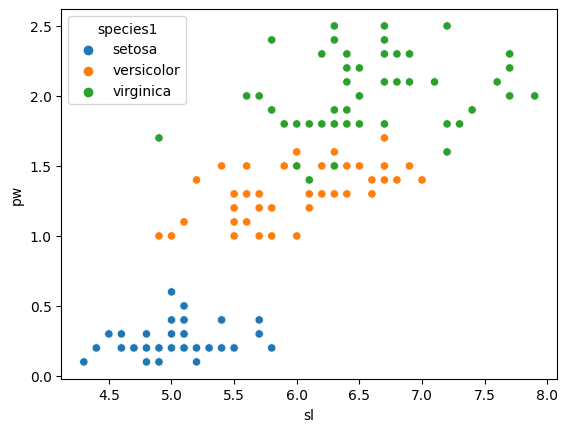

In [41]:
sns.scatterplot(x=df3_full.sl,y=df3_full.pw,hue=df3_full.species1)

<Axes: xlabel='sw', ylabel='pl'>

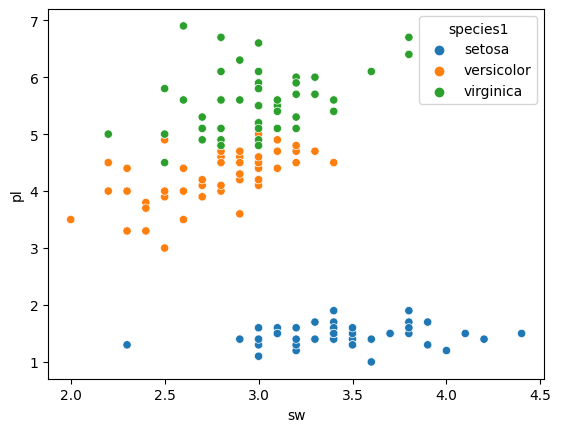

In [42]:
sns.scatterplot(x=df3_full.sw,y=df3_full.pl,hue=df3_full.species1)

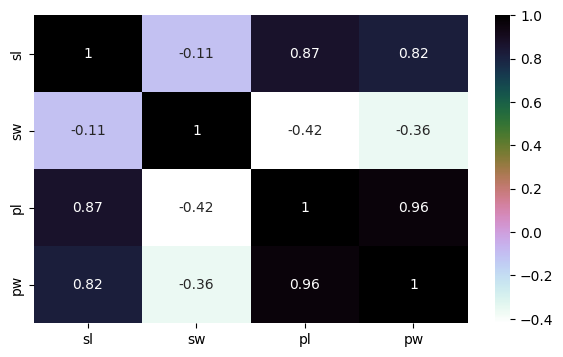

In [43]:
plt.figure(figsize=(7,4))
sns.heatmap(df3_full.corr(numeric_only=True), annot=True, cmap='cubehelix_r')
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
le.fit_transform(df3_full['species1'])
df3_full['species1']=le.fit_transform(df3_full['species1'])
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
df3_full

,sl,sw,pl,pw,species1
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
x = df3_full.iloc[:,:-1]
x

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
y = df3_full.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species1, Length: 150, dtype: int64

In [48]:
df3_full.species1.unique()

array([0, 1, 2])

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=32)

# Model

In [51]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree Algorithm
from sklearn import tree

In [52]:
model = tree.DecisionTreeClassifier()
model.fit(xtrain,ytrain)
model_prediction = model.predict(xtrain)

In [53]:
print(model.score(xtrain,ytrain)*100)
print(model.score(xtest,ytest)*100)

100.0
97.77777777777777


# Calculating Accuracy Score

In [54]:
accuracy_score(ytrain,model_prediction)*100

100.0

In [55]:
model.score(xtest,ytest)*100

97.77777777777777

# **Observations:**

Using Petals over Sepal for training the data gives a much better accuracy. This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high. Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.

I have compiled a notebook covering some advanced ML concepts using a larger dataset. Have a look at that too.
